<a href="https://www.kaggle.com/code/spenceramiller/image-processing-with-pillow?scriptVersionId=135066079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image, ImageFilter
from glob import glob
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt
from scipy.signal import convolve2d, gaussian
from scipy.fft import fft2, ifft2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/pictures/buildings.jpg


file type:  <dtype: 'uint8'>
file format:  JPEG
file size:  (1920, 1273)
file mode:  RGB


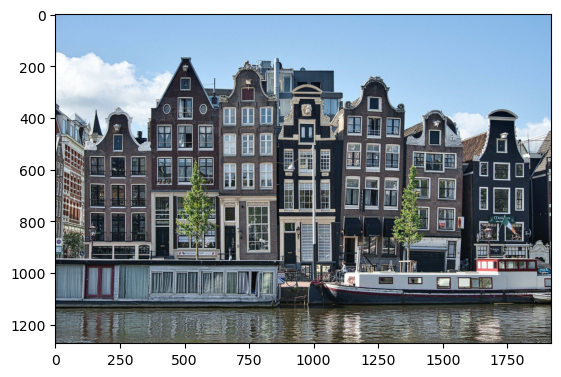

In [2]:
tf_img = io.read_file("/kaggle/input/pictures/buildings.jpg")
tf_img = image.decode_png(tf_img, channels=3)
filename = Image.open('/kaggle/input/pictures/buildings.jpg')

print("file type: ",tf_img.dtype)
print("file format: ",filename.format)
print("file size: ",filename.size)
print("file mode: ",filename.mode)
isinstance(filename, Image.Image)

plt.imshow(tf_img) # Show image

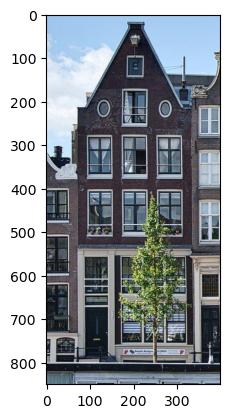

In [3]:
img = Image.open(r"/kaggle/input/pictures/buildings.jpg")
cropped_img = img.crop((300, 150, 700, 1000))
cropped_img.size # (400, 850)

#f, axarr = plt.subplots(2,1)
plt.imshow(cropped_img)

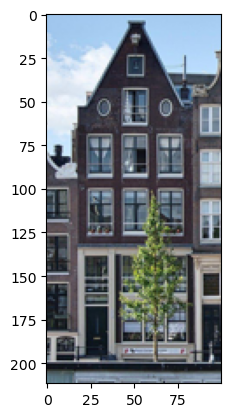

In [4]:
cropped_img = img.crop((300, 150, 700, 1000))  # The arguement to .crop() is an argument to 4-tuple which defines the edges of the region being cropped 
cropped_img.size # (400, 850)                  # The upper left corner of the image is the (0,0) of the cordinate system.                 
                                               # .crop() example: (https://realpython.com/image-processing-with-the-python-pillow-library/)
plt.imshow(cropped_img)

low_res_img = cropped_img.resize(
    (cropped_img.width // 4, cropped_img.height // 4)
)

plt.imshow(low_res_img)

Text(0.5, 1.0, 'low_res_img')

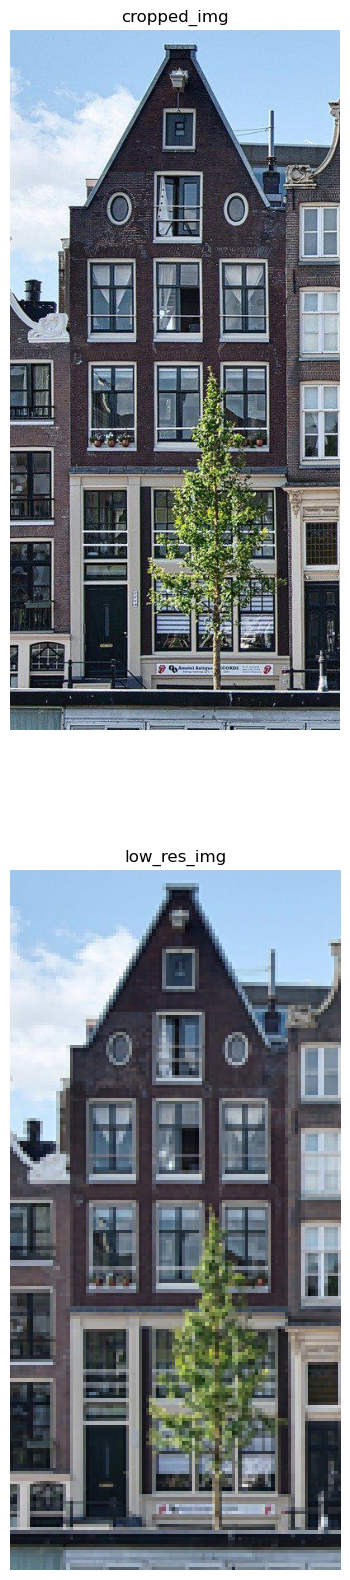

In [5]:
fig = plt.figure(figsize=(10,20)) # figure=(width, height) in inches
 
fig.add_subplot(2,1,1)
plt.imshow(cropped_img)
plt.axis('off')
plt.title("cropped_img")

fig.add_subplot(2,1,2)
plt.imshow(low_res_img)
plt.axis('off')
plt.title("low_res_img")

Text(0.5, 1.0, 'rotate 180')

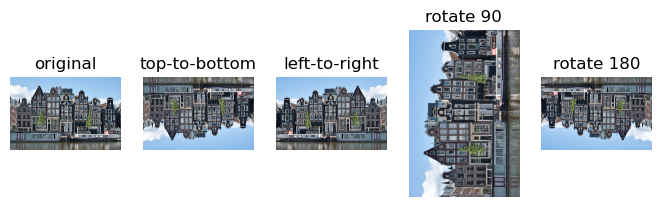

In [6]:
fig = plt.figure(figsize=(10,20)) # figure=(width, height) in inches
 
fig.add_subplot(1,6,1)
plt.imshow(tf_img)
plt.axis('off')
plt.title("original")

fig.add_subplot(1,6,2)
plt.imshow(img.transpose(Image.FLIP_TOP_BOTTOM)) # Flip the orignal image from top to bottom
plt.axis('off')
plt.title("top-to-bottom")

fig.add_subplot(1,6,3)
plt.imshow(img.transpose(Image.FLIP_LEFT_RIGHT)) # Flip the orignal image from left to right
plt.axis('off')
plt.title("left-to-right")

fig.add_subplot(1,6,4)
plt.imshow(img.transpose(Image.ROTATE_90)) # Flip the orignal image from left to right
plt.axis('off')
plt.title("rotate 90")

fig.add_subplot(1,6,5)
plt.imshow(img.transpose(Image.ROTATE_180)) # Flip the orignal image from left to right
plt.axis('off')
plt.title("rotate 180")

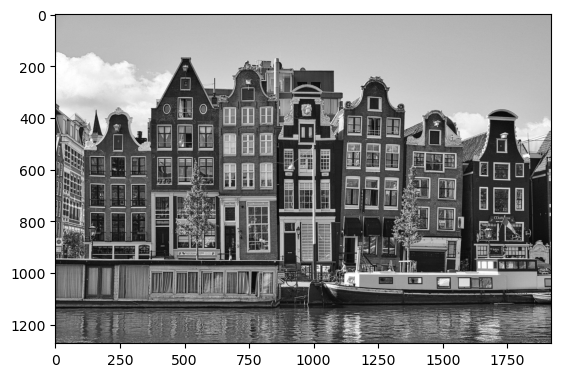

In [7]:
# Greyscale
img_grey = Image.open(r"/kaggle/input/pictures/buildings.jpg").convert('LA')
plt.imshow(img_grey)

Text(0.5, 1.0, 'Blur')

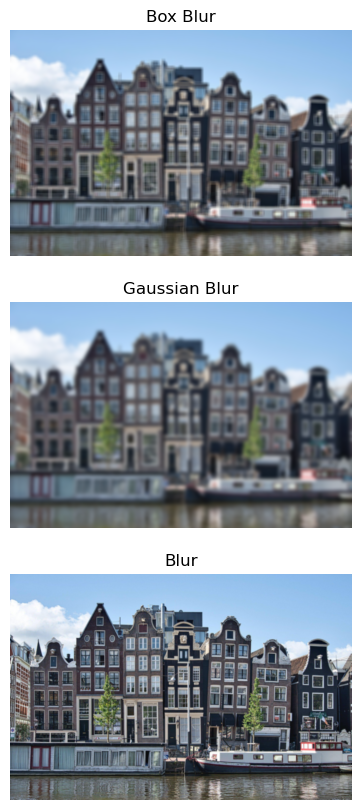

In [8]:
# Box Blur Method - Spatial domain linear filter where each pixel in the resulting image has a value equal to the average value of its neighboting pixels
box_blur_img = img.filter(ImageFilter.BoxBlur(10))           # Box Blur
gaussian_blur_img = img.filter(ImageFilter.GaussianBlur(10)) # Gaussian Blur Image
blur_img = img.filter(ImageFilter.BLUR)                      # Blur 

fig = plt.figure(figsize=(10,10)) # figure=(width, height) in inches

fig.add_subplot(3,1,1)
plt.imshow(box_blur_img)
plt.axis('off')
plt.title("Box Blur")

fig.add_subplot(3,1,2)
plt.imshow(gaussian_blur_img)
plt.axis('off')
plt.title("Gaussian Blur")

fig.add_subplot(3,1,3)
plt.imshow(blur_img)
plt.axis('off')
plt.title("Blur")

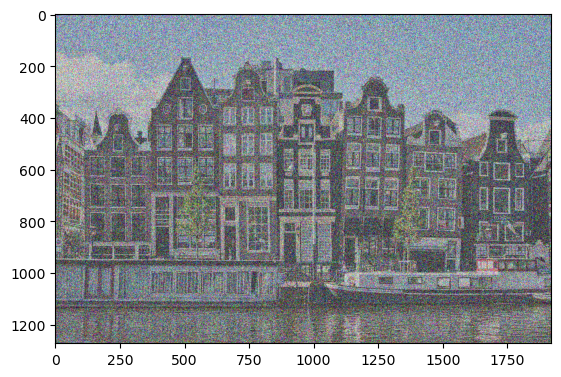

In [9]:
# Adding Gaussian Noise

def gaussian_add(img, sigma = 200):    # sigma controls how much gaussian noise is present
    dummy = np.copy(img).astype(float)
    gauss = np.random.normal(0, sigma, np.shape(img))
    # Additive Noise
    dummy = np.round(gauss + dummy)
    # Saturate lower bound
    dummy[np.where(dummy < 0)] = 0
    # Saturate upper bound
    dummy[np.where(dummy > 255)] = 255
    return np.uint8(dummy)

gaussian_img = gaussian_add(img)
plt.imshow(gaussian_img)

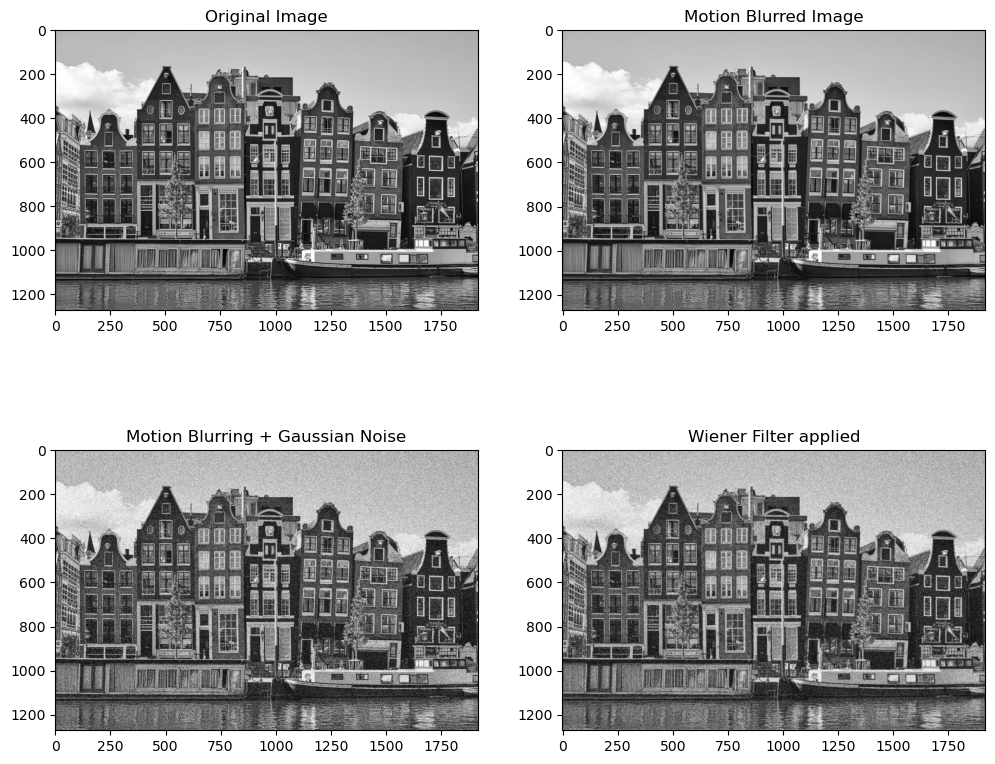

In [10]:
def blur(img, mode = 'box', kernel_size = 3):
    # mode = 'box' or 'gaussian' or 'motion'
    dummy = np.copy(img)
    if mode == 'box':
        h = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
    elif mode == 'gaussian':
        h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
        h = np.dot(h, h.transpose())
        h /= np.sum(h)
    elif mode == 'motion':
        h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
file_name = os.path.join('/kaggle/input/pictures/buildings.jpg') 
img = rgb2gray(plt.imread(file_name))

blurred_img = blur(img, mode = 'motion', kernel_size = 3) # Control Motion Blur

noisy_img = add_gaussian_noise(blurred_img, sigma = 50)   # Control Gaussian Noise

kernel = gaussian_kernel(3)  # Adjust kernel size (NxN)

filtered_img = wiener_filter(noisy_img, kernel, K = 30)
display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()